<a href="https://colab.research.google.com/github/QuantumByteX/Face_Mask_Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Data Augumentation
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.3, 1],
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    validation_split=0.2
)

In [ ]:
batch_size = 32

# Providing data for augumentation
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all base model layers
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Add top layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)  # binary classification

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 8,748,417 (33.37 MB)

 Non-trainable params: 1,537,984 (5.87 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 5,
    mode = 'auto',
    restore_best_weights = True,
    verbose = 1
)

# Training model
history = model.fit(
    train_data,
    steps_per_epoch = 3067 // batch_size,
    epochs = 10,
    callbacks = early_stopping,
    validation_data =val_data,
    validation_steps = 766 // batch_size
)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 79s 715ms/step - accuracy: 0.9147 - loss: 0.2280 - val_accuracy: 0.9810 - val_loss: 0.0548
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9062 - loss: 0.2577 - val_accuracy: 0.9796 - val_loss: 0.0597
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 57s 599ms/step - accuracy: 0.9805 - loss: 0.0562 - val_accuracy: 0.9946 - val_loss: 0.0381
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 1.0000 - loss: 0.0375 - val_accuracy: 0.9932 - val_loss: 0.0473
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 57s 601ms/step - accuracy: 0.9806 - loss: 0.0537 - val_accuracy: 0.9905 - val_loss: 0.0395
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 585ms/step - accuracy: 0.9849 - loss: 0.0456 - val_accuracy: 0.9905 - val_loss: 0.0434
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.

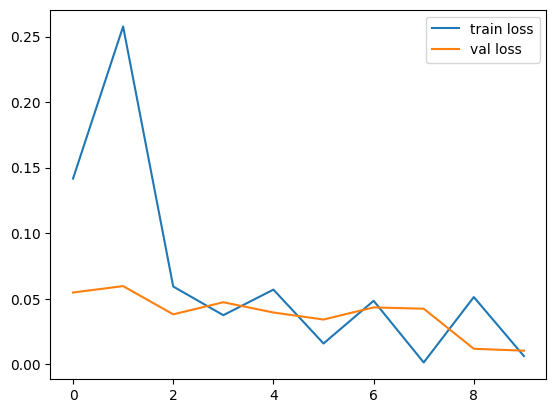

In [ ]:
from matplotlib import pyplot as plt

# Loss graph
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

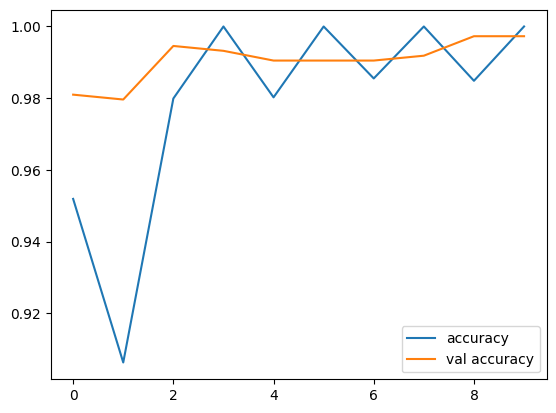

In [ ]:
# Accuracy graph
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [ ]:
# saving model
model.save('mask_Model_01.keras')